In [ ]:
import pandas as pd
import numpy as np
# import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Data Wrangling

In [ ]:
# define a function to clean up the column names
def clean_column_name(name):
    # convert to lower case
    name = name.lower()
    # replace spaces with underscores
    name = name.replace(" ", "_")
    # remove non-alphanumeric characters
    name = ''.join(e for e in name if e.isalnum() or e == '_')
    # check for duplicates
    for i in range(1, len(name)):
        if name[:i] == name[i:]:
            name = name[:i]
            break
    # remove "_2017" from the end of the name
    # name = name.replace("_2017", "")
    name = name.replace("_2017", "").replace("_cdc_wonder", "").replace("_us","")
    # return the cleaned name
    return name
## ------------- End of function ---------------##


In [ ]:
overdose_deaths = pd.read_csv("https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Drug%20overdose%20deaths%20in%20the%20US%20(CDC%20WONDER)/Drug%20overdose%20deaths%20in%20the%20US%20(CDC%20WONDER).csv")
overdose_deaths['Year'] = overdose_deaths['Year'].astype('int')
overdose_deaths.drop('Entity', axis=1, inplace=True)

In [ ]:
# loop through the column names and clean them up
new_columns = {}
for col in overdose_deaths.columns:
    new_col = clean_column_name(col)
    new_columns[col] = new_col

# rename the columns
overdose_deaths.rename(columns=new_columns, inplace=True)

In [ ]:
# Rename the dataframe from data to overdose_deaths
# overdose_deaths = overdose_deaths.rename_axis('year').reset_index()

In [ ]:
overdose_deaths.columns

Index(['year', 'total_overdose_deaths', 'opioid_pain_relievers',
       'benzodiazepines', 'cocaine', 'heroin', 'any_opioids',
       'synthetic_opioids_other_than_methadone',
       'psychostimulants_death_rates', 'antidepressants_death_rates'],
      dtype='object')

In [ ]:
# check for missing values in each column
print(overdose_deaths.isna().any())


## Begin Exploratory Data Analysis

In [ ]:
overdose_deaths.describe()

,year,total_overdose_deaths,opioid_pain_relievers,benzodiazepines,cocaine,heroin,any_opioids,synthetic_opioids_other_than_methadone,psychostimulants_death_rates,antidepressants_death_rates
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,2009.500000,13.563636,3.809091,1.904545,2.350000,2.081818,8.231818,3.145455,1.477273,1.168182
std,6.493587,5.759592,1.256567,1.054007,1.351454,1.685692,4.856747,4.716004,1.879446,0.331499
min,1999.000000,6.100000,1.200000,0.400000,1.300000,0.600000,2.900000,0.300000,0.200000,0.600000
25%,2004.250000,9.575000,2.975000,0.950000,1.425000,0.700000,4.800000,0.600000,0.400000,0.900000
50%,2009.500000,12.100000,4.350000,1.950000,1.750000,1.050000,6.700000,0.850000,0.550000,1.200000
75%,2014.750000,15.900000,4.675000,2.650000,2.425000,3.925000,10.050000,2.775000,1.700000,1.475000
max,2020.000000,28.300000,5.200000,3.700000,6.000000,4.900000,21.400000,17.800000,7.500000,1.700000


In [ ]:
# Calculate the percent of total for each column using Total Overdose Deaths
percent_of_total = (overdose_deaths / overdose_deaths['total_overdose_deaths']) * 100

#### Calculate Quant

In [ ]:
# Calculate the quartiles and IQR for each column
quartiles = overdose_deaths.quantile([0.25, 0.5, 0.75])
q1 = quartiles.loc[0.25]
q2 = quartiles.loc[0.5]
q3 = quartiles.loc[0.75]
iqr = q3 - q1


In [ ]:
# Drop the 'year' column
overdose_deaths_no_year = overdose_deaths.drop(columns=['year'])

# Calculate quartiles for each column
q1 = overdose_deaths_no_year.quantile(0.25)
q2 = overdose_deaths_no_year.quantile(0.5)
q3 = overdose_deaths_no_year.quantile(0.75)
iqr = q3 - q1

# Create a new dataframe with quartile information
quartile_df = pd.DataFrame({
    'q1': q1.values,
    'q2': q2.values,
    'q3': q3.values,
    'iqr': iqr.values
}, index=q1.index)
print(quartile_df)


                                           q1     q2      q3    iqr
total_overdose_deaths                   9.575  12.10  15.900  6.325
opioid_pain_relievers                   2.975   4.35   4.675  1.700
benzodiazepines                         0.950   1.95   2.650  1.700
cocaine                                 1.425   1.75   2.425  1.000
heroin                                  0.700   1.05   3.925  3.225
any_opioids                             4.800   6.70  10.050  5.250
synthetic_opioids_other_than_methadone  0.600   0.85   2.775  2.175
psychostimulants_death_rates            0.400   0.55   1.700  1.300
antidepressants_death_rates             0.900   1.20   1.475  0.575


#### Percent of Total Overdose Deaths

In [ ]:
# Calculate percent of total deaths
percent_of_total = overdose_deaths_no_year.apply(lambda x: x / x.sum() * 100, axis=1)

# Round the percent values to two decimal places
percent_of_total = percent_of_total.round(2)

# Create a new dataframe with percent of total information
percent_df = pd.DataFrame({
    '% of Total': percent_of_total['total_overdose_deaths'].values,
    '% Opioid Pain Relievers': percent_of_total['opioid_pain_relievers'].values,
    '% Benzodiazepines': percent_of_total['benzodiazepines'].values,
    '% Cocaine': percent_of_total['cocaine'].values,
    '% Heroin': percent_of_total['heroin'].values,
    '% Any Opioids': percent_of_total['any_opioids'].values,
    '% Synthetic Opioids other than Methadone': percent_of_total['synthetic_opioids_other_than_methadone'].values,
    '% Psychostimulants death rates': percent_of_total['psychostimulants_death_rates'].values,
    '% Antidepressants death rates': percent_of_total['antidepressants_death_rates'].values
})
print(percent_df)

    % of Total  % Opioid Pain Relievers  % Benzodiazepines  % Cocaine  \
0        44.20                     8.70               2.90      10.14   
1        43.97                     9.22               3.55       9.22   
2        43.87                    10.97               3.87       8.39   
3        42.93                    12.04               3.66       8.38   
4        42.18                    12.32               3.79       8.53   
5        42.15                    13.00               4.04       8.52   
6        41.56                    13.17               4.53       8.64   
7        40.78                    13.83               4.61       8.87   
8        41.18                    14.53               5.19       7.61   
9        40.75                    14.73               5.48       5.82   
10       39.80                    14.72               6.02       4.68   
11       39.68                    15.16               6.77       4.19   
12       39.64                    14.71            

## Good Stuff: Data Visualizations

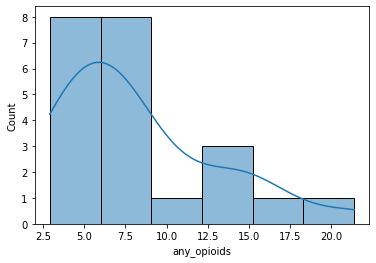

In [ ]:
sns.histplot(data=overdose_deaths_no_year, x='any_opioids', kde=True)

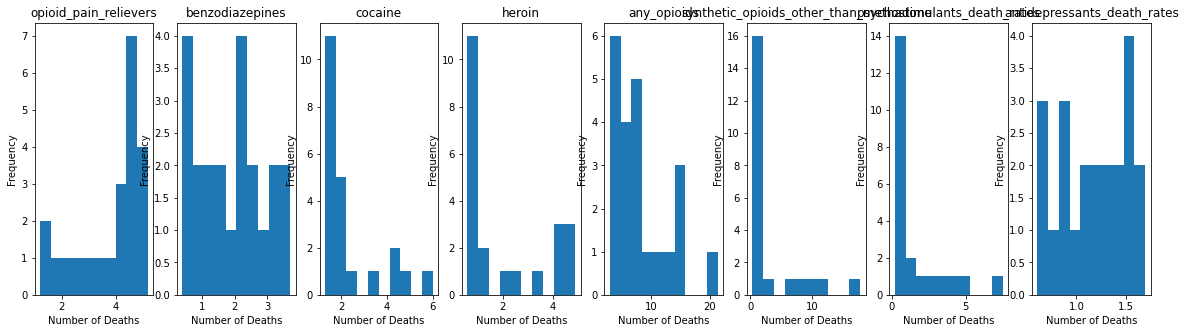

In [ ]:


fig, axs = plt.subplots(1, len(overdose_deaths_no_year.columns), figsize=(20, 5))


for i, col in enumerate(overdose_deaths_no_year.columns):
    axs[i].hist(overdose_deaths_no_year[col], bins=10)
    axs[i].set_title(col)
    axs[i].set_xlabel('Number of Deaths')
    axs[i].set_ylabel('Frequency')

plt.show()


In [ ]:


# Create subplots with 5 rows and 2 columns
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(18.75, 31.25))

# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Iterate over the columns and plot each one
for i, col in enumerate(overdose_deaths.columns[1:]):
    axs[i].plot(overdose_deaths['year'], overdose_deaths[col], color='b')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel(col)
    axs[i].set_title(col)

# Remove any unused subplots
for j in range(len(overdose_deaths.columns) - 1, len(axs)):
    fig.delaxes(axs[j])
    
# Adjust the spacing between the subplots
fig.subplots_adjust(hspace=0.5, wspace=0.3)


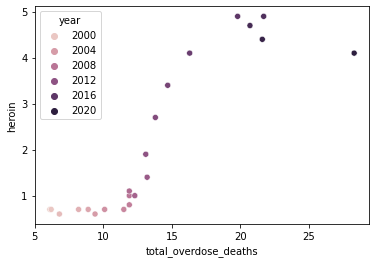

In [ ]:
sns.scatterplot(x="total_overdose_deaths", y="heroin", hue="year", data=overdose_deaths)